# Ondas longitudinales en un cilindro sólido rígido

En un **cilindro sólido y elástico**, las **ondas longitudinales** corresponden a oscilaciones de las partículas del material **en la misma dirección de la propagación**.  
A diferencia del caso acústico en un tubo (fluido), aquí el medio posee rigidez elástica caracterizada por su **módulo de Young** $E$, y la onda se propaga gracias a las deformaciones elásticas del sólido.

---

## 1. Descripción física

Cuando un extremo del cilindro es perturbado (por ejemplo, mediante una fuerza externa o una excitación mecánica), se generan compresiones y dilataciones sucesivas del material.  
Estas perturbaciones se propagan a lo largo del eje del cilindro $x$ en forma de **frentes de esfuerzo y deformación**, los cuales pueden considerarse planos si el radio del cilindro es pequeño respecto a la longitud de onda.

El desplazamiento longitudinal de las partículas se denota por $u(x,t)$, y está relacionado con la deformación uniaxial $\varepsilon = \partial u / \partial x$.  
El esfuerzo normal correspondiente se define como $\sigma = E\, \varepsilon$.

---

## 2. Ecuación de onda longitudinal

A partir de la segunda ley de Newton aplicada a un elemento diferencial del cilindro y la ley de Hooke para un sólido elástico, se obtiene la ecuación de movimiento:

$$
\rho \frac{\partial^2 u}{\partial t^2} = E \frac{\partial^2 u}{\partial x^2}.
$$

Esta es la **ecuación de onda longitudinal** en un medio elástico lineal y homogéneo.  
La velocidad de propagación de la onda se define como:

$$
c_L = \sqrt{\frac{E}{\rho}}.
$$

---

## 3. Ecuación con amortiguamiento y forzamiento externo

En la práctica, los materiales presentan pérdidas internas y pueden estar sometidos a una excitación externa.  
Para incluir estos efectos se añade un término de **amortiguamiento viscoso** proporcional a la velocidad de las partículas y una **fuerza forzante** $F(x,t)$:

$$
\rho \frac{\partial^2 u}{\partial t^2} + 2\alpha \rho \frac{\partial u}{\partial t}
    - E \frac{\partial^2 u}{\partial x^2} = F(x,t),
$$

donde:

- $\alpha$ es el coeficiente de amortiguamiento (s⁻¹),  
- $F(x,t)$ representa la densidad de fuerza aplicada (N/m³),  
- el término $2\alpha \rho \, \partial u / \partial t$ modela la disipación de energía mecánica en el material.

---

## 4. Condiciones de frontera

El cilindro puede presentar distintos tipos de condiciones de contorno:

- **Extremo fijo:** $u = 0$.  
- **Extremo libre:** $\partial u / \partial x = 0$ (sin esfuerzo).  
- **Acoplamiento con una fuente externa:** una fuerza mecánica aplicada o un pistón que impone un desplazamiento o presión en $x=0$.

---

## 5. Extensión tridimensional (modelo de onda plana)

Si el radio del cilindro es mucho menor que la longitud de onda ($R \ll \lambda$), la propagación puede considerarse **unidimensional** (onda plana) y el campo de desplazamiento $u(x,t)$ es aproximadamente uniforme sobre cada sección transversal.  
Esto permite estudiar el problema como una ecuación 1D efectiva, aunque el objeto sea tridimensional.

---

## 6. Objetivo del notebook

Este notebook se enfocará en:

1. Presentar la ecuación de onda longitudinal amortiguada y forzada en un cilindro rígido.  
2. Analizar cómo el módulo de Young $E$, la densidad $\rho$ y el amortiguamiento $\alpha$ afectan la propagación de las ondas.  
3. Servir como base para implementar un esquema numérico por diferencias finitas y visualizar el comportamiento del desplazamiento $u(x,t)$ y los frentes de esfuerzo.

---

> En resumen, este modelo describe la propagación longitudinal de deformaciones elásticas dentro de un cilindro rígido, considerando la elasticidad (módulo de Young), la inercia (densidad) y las pérdidas (amortiguamiento).




## Por qué la aproximación 1D es válida

La condición para que la aproximación 1D valga es $D \ll \lambda$, donde $\lambda$ es la longitud de onda en el material:
$$\lambda=\frac{c_L}{f},\qquad c_L=\sqrt{\frac{E}{\rho}}.$$

Para materiales metálicos típicos $c_L\sim 4{,}000$–$6{,}000\ \mathrm{m/s}$. Tomando $c_L\approx 5{,}000\ \mathrm{m/s}$ y la cota superior audible $f=20\ \text{kHz}$:
$$\lambda_{\min}\approx \frac{5,000}{20,000}=0.25\ \mathrm{m}.$$
Comparada con $D=1\ \mathrm{mm}=10^{-3}\ \mathrm{m}$, $\lambda_{\min}\gg D$ (factor $\sim 250$). Por tanto **no se excitan modos radiales relevantes** en el rango audible y el comportamiento axial se captura bien con un modelo 1D.

---

## Ecuación 1D útil para un cilindro con sección $A$

Si quieres incluir explícitamente el calibre (sección) en la relación fuerza–desplazamiento, la forma más directa es usar la ecuación para la **varilla/barra** (cantidad por unidad de longitud):

$$
\rho A \frac{\partial^2 u}{\partial t^2} + 2\alpha \rho A \frac{\partial u}{\partial t} - E A \frac{\partial^2 u}{\partial x^2} = F(x,t),
$$

donde:

* $A=\pi R^2$ (con $R=D/2$) es el área de la sección transversal,
* $\rho A$ es la masa por unidad de longitud,
* $E A$ aparece en el término de rigidez axial,
* $\alpha$ modela amortiguamiento estructural (s⁻¹),
* $F(x,t)$ es fuerza por unidad de longitud (N/m).

Si divides por $A$ vuelves a la forma en términos de densidad $\rho$:
$$
\rho \frac{\partial^2 u}{\partial t^2} + 2\alpha \rho \frac{\partial u}{\partial t} - E \frac{\partial^2 u}{\partial x^2} = \frac{F(x,t)}{A}.
$$

La velocidad de fase en la rama longitudinal fundamental sigue siendo
$$
c_L=\sqrt{\frac{E}{\rho}},
$$
es decir, el valor de $A$ modifica las magnitudes de fuerzas y energía pero **no** la velocidad básica $c_L$ en la teoría lineal básica.

---

## Supuestos que estás aceptando con el modelo 1D

* Desplazamientos pequeños (linealidad: ley de Hooke válida).
* Material homogéneo e isotrópico (o con propiedades efectivas constantes).
* Secciones transversales permanecen planas (Saint-Venant).
* No hay acoplamiento importante a modos flexionales o torsionales (válido si excitación es axial y radio muy pequeño).

Si alguno de estos no se cumple, habría que usar un modelo axisimétrico o 3D.

---

## Reglas numéricas prácticas para discretización (audible + D=1 mm)

Tomemos $c\approx 5{,}000\ \mathrm{m/s}$ y $f_{\max}=20\ \mathrm{kHz}$:

* Longitud de onda mínima: $\lambda_{\min}\approx 0.25\ \mathrm{m}$.
* Recomendación espacial: tomar paso espacial $dx \le \lambda_{\min}/10$ (regla práctica) → $dx \lesssim 0.025\ \mathrm{m}$.

  * Si tu cilindro mide, por ejemplo, $L=5\ \mathrm{m}$, entonces $N_x \approx 5/0.025 = 200$ puntos.
* Recomendación temporal (CFL y resolución temporal):

  * Condición CFL para esquema explícito: $c,dt/dx \le \text{CFL}_{\max}$ (usar $\text{CFL}\sim 0.8$–$0.95$).
  * Con $dx=0.025\ \mathrm{m}$ y $c=5{,}000\ \mathrm{m/s}$, elegir $dt \lesssim 0.9\cdot dx/c \approx 4.5\times 10^{-6}\ \mathrm{s}$.
  * También conviene que la frecuencia máxima esté bien muestreada: $f_s=1/dt \gtrsim 10 f_{\max}$ (regla práctica para buena representación), lo que da $dt \lesssim 5\times 10^{-6}\ \mathrm{s}$ — consistente con la CFL anterior.
* Si prefieres menos puntos en $x$, todavía puedes usar $dx\le \lambda/6$ para costos menores, pero cuidado con precisión de fase y amplitud.

---

## Condiciones de contorno y pérdidas prácticas

* Extremos **libres** reflejan con condición de esfuerzo nulo ($\partial u/\partial x =0$).
* Extremos **fijos**: $u=0$.
* Para evitar reflexiones en un tubo largo puedes añadir zonas amortiguantes (dashpots) o condiciones absorbentes aproximadas (términos de amortiguamiento local o “impedancia” en el extremo).
* Para pérdidas más físicas en metales, en vez de $2\alpha\rho$ puedes usar un módulo complejo efectivo $E^*(\omega)=E'( \omega)+\mathrm{i} E''(\omega)$ (viscoelasticidad) si necesitas modelar atenuación dependiente de frecuencia.

---



# Efecto de la tensión axial sobre la densidad efectiva del cilindro (área constante)

Consideremos un cilindro inicial de longitud $l_0$, área transversal constante $A_0$ y densidad volumétrica inicial $\rho_0$.  
Al aplicar una **tensión axial** $N$, el cilindro se **alarga** una cantidad $\Delta l$, de modo que la nueva longitud es:

$$
l = l_0(1 + \varepsilon), \qquad \varepsilon = \frac{\Delta l}{l_0}.
$$

El material se asume elástico lineal, por lo que la deformación y la tensión axial $\sigma$ se relacionan mediante el módulo de Young $E$:

$$
\sigma = E\,\varepsilon, \qquad \text{y como } \sigma = \frac{N}{A_0} \;\Rightarrow\; \varepsilon = \frac{N}{E A_0}.
$$

---

## Conservación de la masa

La masa total del cilindro permanece constante durante el estiramiento:

$$
m = \rho_0 A_0 l_0 = \rho(\varepsilon) A_0 l.
$$

De esta igualdad se obtiene la nueva densidad volumétrica:

$$
\rho(\varepsilon) = \frac{\rho_0}{1 + \varepsilon}.
$$

Físicamente, el alargamiento del cilindro corresponde a un **aumento en la distancia promedio entre las moléculas** del sólido, lo que reduce ligeramente la densidad efectiva del medio.

---

## Ecuación de onda longitudinal con densidad dependiente de la tensión

Tomando el área transversal constante y la nueva densidad $\rho(\varepsilon)$, la ecuación de onda longitudinal forzada y amortiguada en una dimensión queda:

$$
\rho(\varepsilon)\, \frac{\partial^2 u}{\partial t^2}
+ 2\alpha\, \rho(\varepsilon)\, \frac{\partial u}{\partial t}
- E\, \frac{\partial^2 u}{\partial x^2}
= f(x,t),
$$

donde:
- $u(x,t)$ es el desplazamiento axial,
- $\alpha$ es el coeficiente de amortiguamiento,
- $f(x,t)$ representa una fuerza externa por unidad de volumen.

Dividiendo toda la ecuación por $\rho(\varepsilon)$:

$$
\frac{\partial^2 u}{\partial t^2}
+ 2\alpha\, \frac{\partial u}{\partial t}
- c_N^2(\varepsilon)\, \frac{\partial^2 u}{\partial x^2}
= \frac{f(x,t)}{\rho(\varepsilon)},
$$

con la **velocidad de propagación dependiente de la tensión**:

$$
c_N(\varepsilon) = \sqrt{\frac{E}{\rho(\varepsilon)}}
= \sqrt{\frac{E}{\rho_0}\,(1 + \varepsilon)}.
$$

Usando $\varepsilon = N/(E A_0)$:

$$
c_N(N) = \sqrt{\frac{E}{\rho_0}\left(1 + \frac{N}{E A_0}\right)}.
$$

---

## Interpretación física

- A medida que el cilindro se estira, la densidad efectiva disminuye, lo que **aumenta la velocidad de propagación** de las ondas longitudinales.  
- El área transversal se mantiene constante, de modo que el cambio de velocidad depende únicamente de la variación de densidad debida a la elongación.  
- Para pequeñas deformaciones ($\varepsilon \ll 1$), puede aproximarse:

$$
c_N \approx c_0 \left(1 + \frac{\varepsilon}{2}\right), \qquad
c_0 = \sqrt{\frac{E}{\rho_0}}.
$$

Esta corrección es suficiente para describir el efecto de tensiones axiales moderadas en cilindros largos y delgados bajo frecuencias del espectro audible.

---

## Forma final simplificada

En resumen, bajo la hipótesis de área constante y tensión axial uniforme:

$$
\boxed{
\frac{\partial^2 u}{\partial t^2}
+ 2\alpha\,\frac{\partial u}{\partial t}
- \frac{E}{\rho_0}\,(1+\varepsilon)\,\frac{\partial^2 u}{\partial x^2}
= \frac{f(x,t)}{\rho_0/(1+\varepsilon)}
}
$$

donde $\varepsilon = N/(E A_0)$ describe la deformación elástica y el cambio asociado de densidad efectiva.


In [4]:
# Simulación de ondas longitudinales en cilindros con diferentes propiedades
# --------------------------------------------------------------------------
# En este bloque se importan las librerías necesarias y se define un diccionario
# con los parámetros físicos de distintos materiales (cuerdas o cilindros).
# Cada entrada contendrá:
#   - Módulo de Young (E)
#   - Densidad volumétrica (rho0)
#   - Diámetro del cilindro (D)
#   - Coeficiente de amortiguamiento (alpha)

import numpy as np
import matplotlib.pyplot as plt

# Diccionario con materiales a simular
# Las unidades son: E [Pa], rho0 [kg/m³], D [m]

cuerdas = {
    'acero': {
        'E': 2.1e11,   # Pa
        'rho0': 7850,  # kg/m³
        'D': 1e-3,     # m (1 mm)
        'alpha': 0.001 # amortiguamiento leve
    },
    'aluminio': {
        'E': 6.9e10,
        'rho0': 2700,
        'D': 1e-3,
        'alpha': 0.001
    },
    'cobre': {
        'E': 1.1e11,
        'rho0': 8960,
        'D': 1e-3,
        'alpha': 0.001
    },
    'nylon': {
        'E': 3.0e9,
        'rho0': 1150,
        'D': 1e-3,
        'alpha': 0.002
    }
}

# Mostramos un resumen de los materiales definidos
for nombre, props in cuerdas.items():
    print(f"{nombre.capitalize()}: E={props['E']:.2e} Pa, ρ₀={props['rho0']} kg/m³, D={props['D']*1e3:.2f} mm")


Acero: E=2.10e+11 Pa, ρ₀=7850 kg/m³, D=1.00 mm
Aluminio: E=6.90e+10 Pa, ρ₀=2700 kg/m³, D=1.00 mm
Cobre: E=1.10e+11 Pa, ρ₀=8960 kg/m³, D=1.00 mm
Nylon: E=3.00e+09 Pa, ρ₀=1150 kg/m³, D=1.00 mm


## Construcción de la malla de simulación dependiente de la tensión

En la simulación de ondas longitudinales en un cilindro elástico, es necesario discretizar tanto el **espacio** como el **tiempo** para resolver numéricamente la ecuación de onda forzada y amortiguada.  
Sin embargo, en este modelo la **longitud efectiva del cilindro** cambia al aplicar una tensión axial, lo que implica que la **malla espacial también depende del estado de deformación**.

### 1. Longitud deformada

Sea $L_0$ la longitud inicial del cilindro y $\Delta L$ la elongación producida por una tensión axial $T$.  
Asumiendo un comportamiento lineal elástico (Ley de Hooke unidimensional), la deformación unitaria es:

$$
\varepsilon = \frac{\Delta L}{L_0} = \frac{T}{E A}
$$

donde:
- $E$ es el módulo de Young del material,
- $A$ el área transversal ($A = \pi D^2 / 4$),
- $T$ la tensión axial aplicada.

La nueva longitud total del cilindro será entonces:

$$
L = L_0 (1 + \varepsilon) = L_0 \left(1 + \frac{T}{E A}\right)
$$

Este valor $L$ define la extensión espacial de la malla sobre la que se resolverá la ecuación de onda.

---

### 2. Malla espacial

Se divide el dominio deformado $[0, L]$ en $N_x$ puntos espaciales equidistantes:

$$
x_i = i \, \Delta x, \quad \text{con} \quad \Delta x = \frac{L}{N_x - 1}, \quad i = 0, 1, \dots, N_x - 1
$$

La elección de $N_x$ dependerá de la resolución deseada y de la estabilidad numérica del esquema temporal (criterio de Courant).

---

### 3. Malla temporal

El paso temporal $\Delta t$ debe satisfacer la condición de estabilidad de Courant-Friedrichs-Lewy (CFL):

$$
c \frac{\Delta t}{\Delta x} \le 1
$$

donde la velocidad de propagación de la onda longitudinal está dada por:

$$
c = \sqrt{\frac{E}{\rho}}
$$

con $\rho$ la densidad efectiva del cilindro.  
Dado que la densidad depende de la elongación (disminuye al aumentar $L$), se toma:

$$
\rho = \rho_0 \frac{L_0}{L} = \rho_0 \frac{1}{1 + \frac{T}{E A}}
$$

De esta forma, tanto $c$ como $\rho$ se actualizan coherentemente con la tensión aplicada.

---

### 4. Resumen computacional

Para cada cuerda (material) y para cada tensión aplicada:
1. Se calcula el área $A$ y la longitud final $L$.
2. Se obtiene la densidad efectiva $\rho$ y la velocidad $c$.
3. Se construye una malla espacial `x` y temporal `t` adecuadas.
4. Estos valores se usarán posteriormente en el esquema numérico (por ejemplo, diferencias finitas explícitas) para simular la evolución temporal de la perturbación longitudinal.



In [5]:
# --------------------------------------------------------------------------
# Función: crear_malla
# --------------------------------------------------------------------------
# Esta función construye la malla espacial y temporal para una cuerda sometida
# a una tensión axial, considerando el cambio de longitud y densidad asociado
# a la deformación elástica.
#
# Parámetros:
#   cuerda : dict   -> propiedades del material (E, rho0, D, alpha)
#   L0     : float  -> longitud inicial de la cuerda [m]
#   T      : float  -> tensión axial aplicada [N]
#   Nx     : int    -> número de puntos espaciales
#   Nt     : int    -> número de pasos temporales
#
# Retorna:
#   diccionario con:
#       x        -> malla espacial [m]
#       t        -> malla temporal [s]
#       dx, dt   -> pasos espaciales y temporales
#       L        -> longitud final [m]
#       rho_eff  -> densidad efectiva [kg/m³]
#       c        -> velocidad de propagación [m/s]
#       alpha    -> coeficiente de amortiguamiento

def crear_malla(cuerda, L0, T, Nx=200, Nt=2000):
    E = cuerda['E']
    rho0 = cuerda['rho0']
    D = cuerda['D']
    alpha = cuerda['alpha']
    
    # Área transversal del cilindro
    A = np.pi * (D/2)**2

    # Deformación unitaria (Ley de Hooke)
    epsilon = T / (E * A)

    # Longitud deformada
    L = L0 * (1 + epsilon)

    # Densidad efectiva (proporcional a L0/L)
    rho_eff = rho0 * (L0 / L)

    # Velocidad de onda longitudinal
    c = np.sqrt(E / rho_eff)

    # Paso espacial
    dx = L / (Nx - 1)

    # Paso temporal (condición CFL con margen de estabilidad)
    dt = 0.9 * dx / c

    # Construcción de las mallas
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, Nt * dt, Nt)

    return {
        'x': x,
        't': t,
        'dx': dx,
        'dt': dt,
        'L': L,
        'rho_eff': rho_eff,
        'c': c,
        'alpha': alpha
    }

# --------------------------------------------------------------------------
# Ejemplo de uso:
# --------------------------------------------------------------------------
# Vamos a crear una malla para la cuerda de acero con:
#   L0 = 5 m, T = 50 N, Nx = 300, Nt = 3000

params = crear_malla(cuerdas['acero'], L0=5.0, T=50.0, Nx=300, Nt=3000)

print(f"Longitud final: {params['L']:.4f} m")
print(f"Densidad efectiva: {params['rho_eff']:.2f} kg/m³")
print(f"Velocidad de onda: {params['c']:.2f} m/s")
print(f"Δx = {params['dx']:.5f} m, Δt = {params['dt']:.6e} s")


Longitud final: 5.0015 m
Densidad efectiva: 7847.62 kg/m³
Velocidad de onda: 5172.98 m/s
Δx = 0.01673 m, Δt = 2.910264e-06 s


## Método numérico para la ecuación de onda longitudinal amortiguada y forzada
### Caso: tubo cilíndrico con extremo forzado y libre, excitado con un barrido de frecuencias

El sistema corresponde a un **tubo cilíndrico rígido** (aproximado unidimensionalmente) sometido a una **excitación longitudinal en un extremo ($x=0$)**, mientras que el otro extremo ($x=L$) permanece **libre**.  
El objetivo es estudiar la respuesta del sistema a un **barrido de frecuencias** que recorra el espectro audible humano, revelando los modos de resonancia y el comportamiento acústico dependiente del material y la tensión aplicada.

---

### 1. Ecuación de movimiento

La ecuación de onda longitudinal amortiguada y forzada es:

$$
\frac{\partial^2 u(x,t)}{\partial t^2}
+ \alpha \frac{\partial u(x,t)}{\partial t}
= c^2 \frac{\partial^2 u(x,t)}{\partial x^2} + f(x,t)
$$

donde:
- $u(x,t)$ es el desplazamiento longitudinal,
- $c = \sqrt{E / \rho_{\text{eff}}}$ es la velocidad efectiva de propagación,
- $\alpha$ representa las pérdidas internas del material,
- $f(x,t)$ es el término de excitación o fuerza externa.

---

### 2. Condiciones de frontera

1. **Extremo izquierdo (x = 0): forzado**  
   En este extremo se aplica una señal excitadora que realiza un **barrido temporal de frecuencias**:

   $$
   u(0,t) = A \sin\left( 2\pi f(t) \, t \right)
   $$

   donde $f(t)$ varía de manera continua entre dos valores:  
   $f_{\text{min}} = 20~\text{Hz}$ y $f_{\text{max}} = 20{,}000~\text{Hz}$.

   Este tipo de excitación (también conocida como *chirp* o *sweep*) permite observar la respuesta del tubo a todo el rango audible en una sola simulación.

   La función de barrido lineal en el tiempo puede definirse como:

   $$
   f(t) = f_{\text{min}} + (f_{\text{max}} - f_{\text{min}}) \frac{t}{t_{\text{max}}}
   $$

   o bien de manera exponencial, para mantener una tasa de cambio constante en escala logarítmica:

   $$
   f(t) = f_{\text{min}} \left( \frac{f_{\text{max}}}{f_{\text{min}}} \right)^{t/t_{\text{max}}}
   $$

2. **Extremo derecho (x = L): libre**  
   No hay fuerza neta en el borde:

   $$
   \frac{\partial u}{\partial x}\Big|_{x=L} = 0
   $$

   lo que en diferencias finitas equivale a:

   $$
   u_{N}^{n} = u_{N-1}^{n}
   $$

---

### 3. Discretización y esquema explícito

La ecuación se discretiza mediante el esquema explícito centrado en el tiempo y en el espacio:

$$
u_i^{n+1} =
(2 - \alpha \Delta t) u_i^n
- (1 - \alpha \Delta t) u_i^{n-1}
+ c^2 \left( \frac{(\Delta t)^2}{(\Delta x)^2} \right)
\left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right)
+ (\Delta t)^2 f_i^n
$$

con estabilidad garantizada por el criterio CFL:

$$
r = \frac{c \Delta t}{\Delta x} \le 1
$$

---

### 4. Condiciones iniciales

Inicialmente, el tubo se encuentra en reposo:

$$
u(x,0) = 0, \quad \frac{\partial u}{\partial t}(x,0) = 0
$$

---

### 5. Interpretación física

El barrido de frecuencias genera una excitación continua que:
- Explora todos los modos longitudinales de resonancia del tubo.
- Permite identificar las frecuencias naturales mediante la amplitud máxima de respuesta.
- Muestra cómo el amortiguamiento y la densidad efectiva afectan la propagación de ondas y las pérdidas de energía.

En el extremo libre ($x=L$), la onda se refleja **sin inversión de fase**, y la superposición con la onda incidente produce una distribución estacionaria dependiente de la frecuencia.

---

### 6. Procedimiento de simulación

1. Generar la malla dependiente de la tensión (usando `crear_malla()`).
2. Definir el barrido de frecuencia $f(t)$ y la excitación $u(0,t)$.
3. Aplicar condiciones de frontera: forzado en $x=0$, libre en $x=L$.
4. Resolver la ecuación con diferencias finitas explícitas.
5. Registrar la respuesta $u(x,t)$ o $u(L,t)$.
6. Analizar los resultados en el dominio del tiempo y de la frecuencia (por ejemplo, mediante FFT).



## Método numérico: integración temporal con excitación de barrido de frecuencias

Para simular las ondas longitudinales en el tubo, se resuelve numéricamente la ecuación diferencial unidimensional:

$$
\frac{\partial^2 u(x,t)}{\partial t^2} = c^2(\sigma) \frac{\partial^2 u(x,t)}{\partial x^2} - \alpha \frac{\partial u(x,t)}{\partial t}
$$

donde:
- $u(x,t)$ es el desplazamiento longitudinal.
- $c(\sigma) = \sqrt{\frac{E}{\rho(\sigma)}}$ es la velocidad del sonido efectiva, dependiente de la tensión aplicada a través del cambio de densidad.
- $\alpha$ es el coeficiente de amortiguamiento.

El sistema físico se modela como un **tubo con un extremo forzado (x=0)** y **un extremo libre (x=L)**:
- En el extremo izquierdo se aplica una excitación temporal sinusoidal de frecuencia variable:
  $$
  u(0,t) = A_0 \sin\left( 2\pi f(t) t \right)
  $$
  donde $f(t)$ barre el espectro audible de 20 Hz a 20 kHz de manera lineal o logarítmica durante el tiempo total de simulación $T$.
- En el extremo derecho se cumple la condición de frontera libre:
  $$
  \frac{\partial u}{\partial x}\bigg|_{x=L} = 0
  $$

### Discretización numérica
Se usa el esquema explícito de diferencias finitas en el tiempo y espacio (método de las tres diagonales):

$$
u_i^{n+1} = (2 - \alpha \Delta t)u_i^n - (1 - \alpha \Delta t)u_i^{n-1} + \left( \frac{c \Delta t}{\Delta x} \right)^2 (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
$$

donde:
- $\Delta x$ es el paso espacial definido por la malla generada para cada cuerda.
- $\Delta t$ se selecciona de acuerdo con la condición de estabilidad de Courant:
  $$
  \Delta t \le \frac{\Delta x}{c_{\text{max}}}
  $$
  con $c_{\text{max}}$ la velocidad máxima esperada.

### Procedimiento de simulación
1. Se define la malla espacial para una cuerda con longitud inicial $L_0$ y se calcula su nueva longitud $L$ bajo la tensión aplicada.
2. Se actualiza la densidad efectiva $\rho(\sigma)$ y con ello la velocidad de propagación $c(\sigma)$.
3. Se inicializa el campo de desplazamientos $u(x,t)$ con condiciones de reposo.
4. En cada paso temporal:
   - Se actualizan las posiciones según el esquema de diferencias finitas.
   - Se aplica la excitación sinusoidal de frecuencia variable en $x=0$.
   - Se mantiene la condición libre en $x=L$.
5. Se registra el desplazamiento o la velocidad en puntos específicos para analizar resonancias y respuesta espectral.

### Resultados esperados
- Se obtendrán las **resonancias naturales** del tubo como picos en la respuesta.
- El barrido de frecuencias permitirá observar las **frecuencias propias dependientes de la tensión aplicada**, ya que la elongación modifica tanto la longitud efectiva como la densidad.


In [10]:
# (copia idéntica a la celda ejecutada)
import numpy as np
import matplotlib.pyplot as plt

cuerdas = {
    'acero': {'E': 2.1e11, 'rho0': 7850, 'D': 1e-3, 'alpha': 0.001},
    'aluminio': {'E': 6.9e10, 'rho0': 2700, 'D': 1e-3, 'alpha': 0.001},
    'cobre': {'E': 1.1e11, 'rho0': 8960, 'D': 1e-3, 'alpha': 0.001},
    'nylon': {'E': 3.0e9, 'rho0': 1150, 'D': 1e-3, 'alpha': 0.002}
}

def crear_malla(cuerda, L0, T_axial, Nx=160, CFL=0.9):
    E = cuerda['E']; rho0 = cuerda['rho0']; D = cuerda['D']; alpha = cuerda['alpha']
    A = np.pi*(D/2)**2
    epsilon = T_axial / (E * A)
    L = L0*(1+epsilon)
    rho_eff = rho0 * (L0 / L)
    c = np.sqrt(E / rho_eff)
    dx = L / (Nx - 1)
    dt = CFL * dx / c
    return {'x': np.linspace(0, L, Nx), 't_dt': dt, 'dx': dx, 'L': L,
            'rho_eff': rho_eff, 'c': c, 'alpha': alpha, 'Nx': Nx}

def generar_barrido(t_array, f_min=20.0, f_max=20000.0, modo='linear'):
    tmax = t_array[-1] if len(t_array)>0 else 1.0
    if modo == 'linear':
        f_t = f_min + (f_max - f_min) * (t_array / tmax)
    elif modo == 'log':
        f_t = f_min * (f_max / f_min)**(t_array / tmax)
    else:
        raise ValueError("modo debe ser 'linear' o 'log'")
    phase = 2*np.pi * np.cumsum(f_t * np.diff(np.concatenate(([0.0], t_array))))
    s = np.sin(phase)
    return f_t, s

def simular_onda_sweep(cuerda, L0, T_axial, A0=1e-6, f_min=20.0, f_max=20000.0,
                       T_total=0.08, Nx=160, CFL=0.9, modo_barrido='linear',
                       snap_limit=200):
    mesh = crear_malla(cuerda, L0, T_axial, Nx=Nx, CFL=CFL)
    x = mesh['x']; dx = mesh['dx']; dt = mesh['t_dt']; L = mesh['L']
    rho_eff = mesh['rho_eff']; c = mesh['c']; alpha = mesh['alpha']
    Nx = mesh['Nx']
    Nt = int(np.ceil(T_total / dt))
    t = np.linspace(0, Nt*dt, Nt)
    f_t, s_t = generar_barrido(t, f_min=f_min, f_max=f_max, modo=modo_barrido)
    source_signal = A0 * s_t
    u_prev = np.zeros(Nx); u = np.zeros(Nx); u_next = np.zeros(Nx)
    snap_interval = max(1, Nt // snap_limit)
    snapshots = []
    r2 = (c*dt/dx)**2
    damp_coeff = 2*alpha*dt
    for n in range(Nt):
        u_next[1:-1] = ((2 - damp_coeff) * u[1:-1]
                        - (1 - 0.5*damp_coeff) * u_prev[1:-1]
                        + r2 * (u[2:] - 2*u[1:-1] + u[:-2]))
        u_next[0] = source_signal[n]
        u_next[-1] = u_next[-2]
        if n % snap_interval == 0:
            snapshots.append(u.copy())
        u_prev, u = u, u_next.copy()
    snapshots = np.array(snapshots)
    results = {'x': x, 't': t, 'u_final': u, 'snapshots': snapshots, 'dt': dt, 'dx': dx,
               'rho_eff': rho_eff, 'c': c, 'L': L, 'Nx': Nx, 'Nt': Nt, 'source_signal': source_signal,
               'f_t': f_t}
    return results

def obtener_uL_time_series(cuerda, L0, T_axial, A0, T_total, Nx, CFL, modo_barrido):
    mesh = crear_malla(cuerda, L0, T_axial, Nx=Nx, CFL=CFL)
    dx = mesh['dx']; dt = mesh['t_dt']; Nx = mesh['Nx']
    Nt = int(np.ceil(T_total/dt))
    t = np.linspace(0, Nt*dt, Nt)
    _, s_t = generar_barrido(t, f_min=20.0, f_max=20000.0, modo=modo_barrido)
    source_signal = A0 * s_t
    u_prev = np.zeros(Nx); u = np.zeros(Nx); u_next = np.zeros(Nx)
    uL_series = np.zeros(Nt)
    r2 = (mesh['c']*dt/dx)**2
    damp_coeff = 2*mesh['alpha']*dt
    for n in range(Nt):
        u_next[1:-1] = ((2 - damp_coeff) * u[1:-1]
                        - (1 - 0.5*damp_coeff) * u_prev[1:-1]
                        + r2 * (u[2:] - 2*u[1:-1] + u[:-2]))
        u_next[0] = source_signal[n]
        u_next[-1] = u_next[-2]
        u_prev, u = u, u_next.copy()
        uL_series[n] = u[-1]
    return t, uL_series


=== Resumen de la simulación ===
Material: acero
Longitud final L = 0.010 m
Velocidad de onda c = 5175.3 m/s
Δx = 6.2969e-05 m, Δt = 1.0950e-08 s
Nx = 160, Nt = 7305607


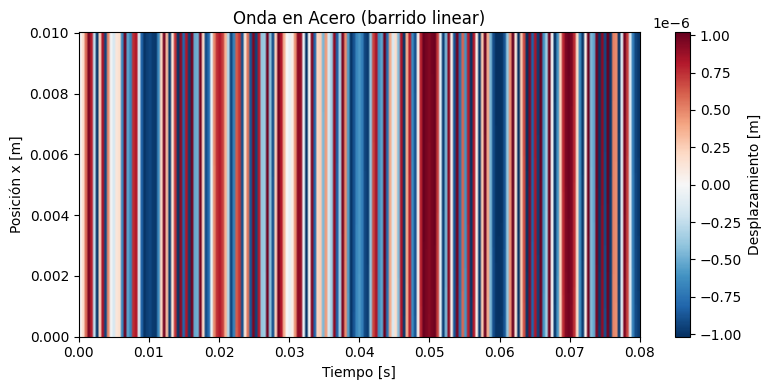

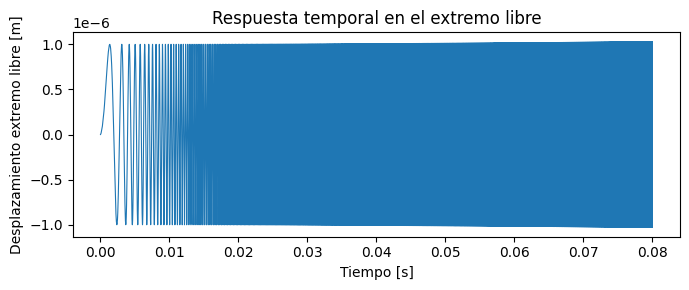

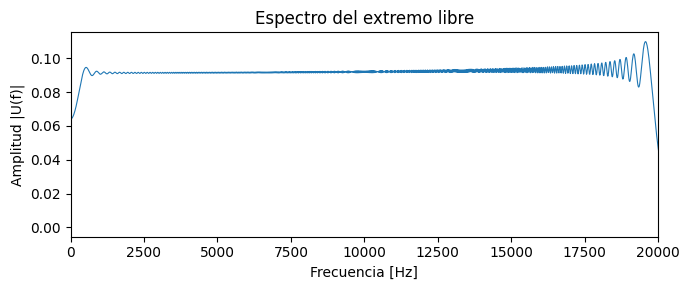

In [12]:
# ----------------------------------------------------------------------
# Ejemplo: tubo/cuerda de acero con un extremo forzado (barrido de frecuencias)
# ----------------------------------------------------------------------

# Parámetros físicos y numéricos
material = 'acero'      # Material de la cuerda
L0 = 0.01                # Longitud inicial [m]
T_axial = 200.0         # Tensión axial [N]
A0 = 1e-6               # Amplitud del desplazamiento forzado [m]
T_total = 0.08          # Duración total de la simulación [s]
Nx = 160                # Número de nodos espaciales
CFL = 0.9               # Factor de estabilidad
modo_barrido = 'linear' # 'linear' o 'log'

# Ejecutar simulación
res = simular_onda_sweep(
    cuerda=cuerdas[material],
    L0=L0,
    T_axial=T_axial,
    A0=A0,
    f_min=20.0,
    f_max=20000.0,
    T_total=T_total,
    Nx=Nx,
    CFL=CFL,
    modo_barrido=modo_barrido
)

# ----------------------------------------------------------------------
# Visualización de resultados
# ----------------------------------------------------------------------

# Parámetros físicos y de malla
print("=== Resumen de la simulación ===")
print(f"Material: {material}")
print(f"Longitud final L = {res['L']:.3f} m")
print(f"Velocidad de onda c = {res['c']:.1f} m/s")
print(f"Δx = {res['dx']:.4e} m, Δt = {res['dt']:.4e} s")
print(f"Nx = {res['Nx']}, Nt = {res['Nt']}")

# Figura 1: mapa espacio-temporal del desplazamiento
plt.figure(figsize=(8,4))
plt.imshow(
    res['snapshots'].T, 
    extent=[0, res['t'][-1], 0, res['L']], 
    origin='lower', 
    aspect='auto',
    cmap='RdBu_r'
)
plt.colorbar(label='Desplazamiento [m]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición x [m]')
plt.title(f'Onda en {material.capitalize()} (barrido {modo_barrido})')
plt.tight_layout()
plt.show()

# Figura 2: señal en el extremo libre (x = L)
t, uL = obtener_uL_time_series(
    cuerda=cuerdas[material],
    L0=L0,
    T_axial=T_axial,
    A0=A0,
    T_total=T_total,
    Nx=Nx,
    CFL=CFL,
    modo_barrido=modo_barrido
)

plt.figure(figsize=(7,3))
plt.plot(t, uL, lw=0.8)
plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento extremo libre [m]')
plt.title('Respuesta temporal en el extremo libre')
plt.tight_layout()
plt.show()

# Figura 3: espectro (FFT) del extremo libre
U = np.fft.rfft(uL)
freqs = np.fft.rfftfreq(len(uL), d=res['dt'])
plt.figure(figsize=(7,3))
plt.plot(freqs, np.abs(U), lw=0.8)
plt.xlim(0, 20000)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud |U(f)|')
plt.title('Espectro del extremo libre')
plt.tight_layout()
plt.show()


## Cálculo de energía espectral en el extremo libre

Para cuantificar cuánta energía acústica se transmite y refleja dentro del tubo o cilindro, se introduce la **densidad espectral de potencia** en el extremo libre, obtenida a partir de la Transformada de Fourier del desplazamiento:

$$
S(f) = |U(f)|^2
$$

donde $U(f)$ es la transformada de Fourier del desplazamiento $u(L, t)$ en el extremo libre.

El **área espectral total** se calcula como:

$$
A_{\text{espectral}} = \int_0^{f_{\max}} S(f)\, df
$$

Este valor es proporcional a la **energía total transmitida** hacia el extremo libre durante el barrido de frecuencias, permitiendo comparar la eficiencia de propagación entre distintos materiales o tensiones.

En la práctica:
- Un **mayor valor de $A_{\text{espectral}}$** indica que el material o la tensión permite una mejor transmisión de energía acústica.
- Un **menor valor** refleja mayor amortiguamiento o menor acoplamiento con las frecuencias forzadas.

### Implementación y paralelización

Para optimizar el cálculo:
- Se paralelizan las simulaciones de diferentes cuerdas o tensiones usando la librería `joblib`.
- Cada proceso independiente ejecuta la simulación de una cuerda, obtiene su señal en el extremo libre y calcula su área espectral.
- Al final, los resultados se combinan en una tabla comparativa.

La paralelización es útil porque cada simulación es independiente, y puede distribuirse entre múltiples núcleos del procesador.


/tmp/ipykernel_225526/3173438210.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3173438210.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3173438210.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3173438210.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.


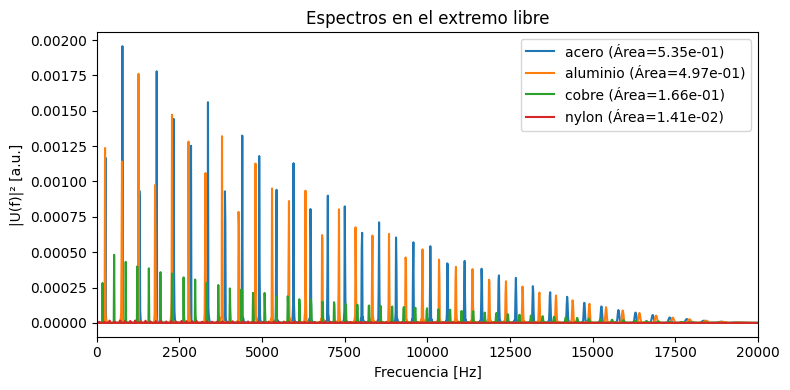

Acero      | L=5.006 m | c=5175.3 m/s | Área espectral = 5.350e-01
Aluminio   | L=5.018 m | c=5064.6 m/s | Área espectral = 4.970e-01
Cobre      | L=5.012 m | c=3507.9 m/s | Área espectral = 1.663e-01
Nylon      | L=5.424 m | c=1682.3 m/s | Área espectral = 1.409e-02


In [14]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

def calcular_area_espectral(uL, dt):
    """Calcula el área espectral total de una señal uL(t)."""
    U = np.fft.rfft(uL)
    freqs = np.fft.rfftfreq(len(uL), d=dt)
    S = np.abs(U)**2
    area = np.trapz(S, freqs)
    return area, freqs, S

def simular_y_medir(nombre, props, L0, T_axial, A0, T_total, Nx, CFL, modo_barrido):
    """Ejecuta una simulación y devuelve su área espectral."""
    res = simular_onda_sweep(
        cuerda=props, L0=L0, T_axial=T_axial, A0=A0,
        f_min=20, f_max=20000, T_total=T_total,
        Nx=Nx, CFL=CFL, modo_barrido=modo_barrido
    )
    t, uL = obtener_uL_time_series(
        cuerda=props, L0=L0, T_axial=T_axial, A0=A0,
        T_total=T_total, Nx=Nx, CFL=CFL, modo_barrido=modo_barrido
    )
    area, freqs, S = calcular_area_espectral(uL, res['dt'])
    return {
        "nombre": nombre,
        "L": res["L"],
        "c": res["c"],
        "area_espectral": area,
        "freqs": freqs,
        "S": S
    }

# ----------------------------------------------------------------------
# Ejecución paralela de todas las cuerdas
# ----------------------------------------------------------------------
resultados = Parallel(n_jobs=-1, backend="loky")(
    delayed(simular_y_medir)(nombre, props, 5.0, 200.0, 1e-6, 0.08, 500, 0.9, 'linear')
    for nombre, props in cuerdas.items()
)

# ----------------------------------------------------------------------
# Comparación gráfica de espectros
# ----------------------------------------------------------------------
plt.figure(figsize=(8,4))
for r in resultados:
    plt.plot(r["freqs"], r["S"], label=f"{r['nombre']} (Área={r['area_espectral']:.2e})")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|U(f)|² [a.u.]")
plt.xlim(0, 20000)
plt.title("Espectros en el extremo libre")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# Tabla resumen
# ----------------------------------------------------------------------
for r in resultados:
    print(f"{r['nombre'].capitalize():10s} | L={r['L']:.3f} m | c={r['c']:.1f} m/s | Área espectral = {r['area_espectral']:.3e}")


## Eficiencia espectral normalizada

La **eficiencia de transmisión acústica** $\eta$ se define como la razón entre la energía espectral total en el extremo libre y la energía espectral total inyectada en el extremo forzado:

$$
\eta = \frac{A_{\text{salida}}}{A_{\text{entrada}}}
$$

donde:
- $A_{\text{salida}} = \int_0^{f_{\max}} |U_L(f)|^2 df$ es el área espectral medida en el extremo libre ($x = L$),
- $A_{\text{entrada}} = \int_0^{f_{\max}} |U_0(f)|^2 df$ corresponde al desplazamiento aplicado en el extremo forzado ($x = 0$).

Esta razón $\eta$ permite comparar materiales, tensiones o amortiguamientos de forma *normalizada*, sin depender de la amplitud absoluta de la fuente.

Interpretación:
- $\eta \approx 1$ → alta eficiencia de transmisión (baja disipación).
- $\eta \ll 1$ → el sistema atenúa o disipa gran parte de la energía antes de llegar al extremo libre.

La eficiencia puede verse como una medida de la *transparencia acústica* del cilindro ante excitaciones longitudinales.


/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.


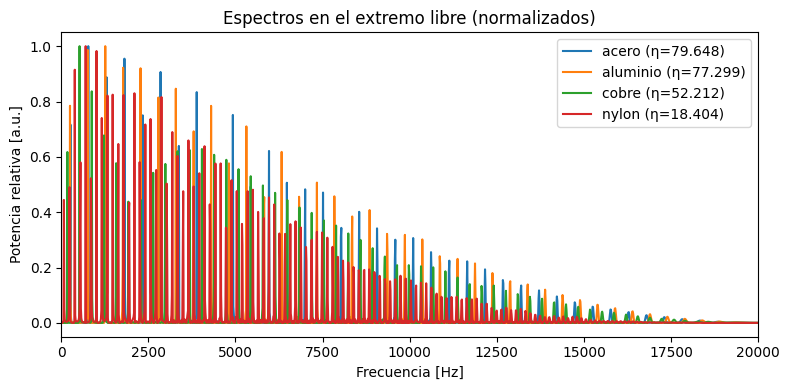

=== Resumen de eficiencia espectral ===
Acero      | L=5.006 m | c=5175.3 m/s | Área_in=6.667e-04 | Área_out=5.310e-02 | η=79.648
Aluminio   | L=5.018 m | c=5064.6 m/s | Área_in=6.381e-04 | Área_out=4.933e-02 | η=77.299
Cobre      | L=5.012 m | c=3507.9 m/s | Área_in=3.060e-04 | Área_out=1.597e-02 | η=52.212
Nylon      | L=5.424 m | c=1682.3 m/s | Área_in=6.043e-05 | Área_out=1.112e-03 | η=18.404


In [15]:
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt

def calcular_area_espectral(u, dt):
    """Calcula el área espectral total de una señal u(t)."""
    U = np.fft.rfft(u)
    freqs = np.fft.rfftfreq(len(u), d=dt)
    S = np.abs(U)**2
    area = np.trapz(S, freqs)
    return area, freqs, S

def simular_y_medir_eficiencia(nombre, props, L0, T_axial, A0, T_total, Nx, CFL, modo_barrido):
    """Ejecuta una simulación completa y calcula la eficiencia espectral normalizada."""
    # Simular con condiciones de frontera forzada y libre
    res = simular_onda_sweep(
        cuerda=props, L0=L0, T_axial=T_axial, A0=A0,
        f_min=20, f_max=20000, T_total=T_total,
        Nx=Nx, CFL=CFL, modo_barrido=modo_barrido
    )

    # Señales en ambos extremos
    t, uL = obtener_uL_time_series(
        cuerda=props, L0=L0, T_axial=T_axial, A0=A0,
        T_total=T_total, Nx=Nx, CFL=CFL, modo_barrido=modo_barrido
    )
    u0 = A0 * np.sin(2 * np.pi * np.linspace(20, 20000, len(t)) * t / T_total)

    # Cálculo de áreas espectrales
    area_L, freqs, S_L = calcular_area_espectral(uL, res['dt'])
    area_0, _, S_0 = calcular_area_espectral(u0, res['dt'])

    eficiencia = area_L / area_0 if area_0 > 0 else 0.0

    return {
        "nombre": nombre,
        "L": res["L"],
        "c": res["c"],
        "area_entrada": area_0,
        "area_salida": area_L,
        "eficiencia": eficiencia,
        "freqs": freqs,
        "S_L": S_L
    }

# ----------------------------------------------------------------------
# Ejecución paralela en todas las cuerdas
# ----------------------------------------------------------------------
resultados = Parallel(n_jobs=-1, backend="loky")(
    delayed(simular_y_medir_eficiencia)(nombre, props, 5.0, 200.0, 1e-6, 0.08, 160, 0.9, 'linear')
    for nombre, props in cuerdas.items()
)

# ----------------------------------------------------------------------
# Visualización: espectros normalizados
# ----------------------------------------------------------------------
plt.figure(figsize=(8,4))
for r in resultados:
    plt.plot(r["freqs"], r["S_L"] / np.max(r["S_L"]), label=f"{r['nombre']} (η={r['eficiencia']:.3f})")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia relativa [a.u.]")
plt.title("Espectros en el extremo libre (normalizados)")
plt.legend()
plt.xlim(0, 20000)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# Tabla resumen
# ----------------------------------------------------------------------
print("=== Resumen de eficiencia espectral ===")
for r in resultados:
    print(f"{r['nombre'].capitalize():10s} | L={r['L']:.3f} m | c={r['c']:.1f} m/s | "
          f"Área_in={r['area_entrada']:.3e} | Área_out={r['area_salida']:.3e} | η={r['eficiencia']:.3f}")


In [19]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

# ----------------------------------------------------------------------
# Parámetros globales
# ----------------------------------------------------------------------
longitudes_iniciales = [1, 5, 10, 25, 50, 75, 100]   # Longitudes iniciales [m]
tensiones = np.linspace(1, 20, 20)                   # Tensiones [N]
A0 = 1e-6
T_total = 0.08
Nx = 160
CFL = 0.9
modo_barrido = 'linear'

# ----------------------------------------------------------------------
# Función auxiliar: ejecutar una simulación para (material, L0, T)
# ----------------------------------------------------------------------
def ejecutar_prueba(nombre, props, L0, T_axial):
    try:
        r = simular_y_medir_eficiencia(
            nombre, props, L0=L0, T_axial=T_axial, A0=A0,
            T_total=T_total, Nx=Nx, CFL=CFL, modo_barrido=modo_barrido
        )
        r.update({"L0": L0, "T_axial": T_axial})
        return r
    except Exception as e:
        # En caso de fallo, se registra el error y se continúa
        return {"nombre": nombre, "L0": L0, "T_axial": T_axial, "eficiencia": np.nan, "error": str(e)}

# ----------------------------------------------------------------------
# Generar todas las combinaciones posibles (material, L0, T)
# ----------------------------------------------------------------------
tareas = [
    (nombre, props, L0, T)
    for L0 in longitudes_iniciales
    for T in tensiones
    for nombre, props in cuerdas.items()
]

print(f"Ejecutando {len(tareas)} simulaciones en paralelo...")

# ----------------------------------------------------------------------
# Ejecución paralela
# ----------------------------------------------------------------------
resultados = Parallel(n_jobs=-1, backend="loky")(
    delayed(ejecutar_prueba)(nombre, props, L0, T)
    for nombre, props, L0, T in tareas
)

# ----------------------------------------------------------------------
# Conversión a DataFrame y limpieza
# ----------------------------------------------------------------------
df = pd.DataFrame(resultados)
df = df.dropna(subset=["eficiencia"])  # eliminar errores si existen

# ----------------------------------------------------------------------
# Ranking por longitud inicial (L0)
# ----------------------------------------------------------------------
ranking = (
    df.loc[df.groupby("L0")["eficiencia"].idxmax(), ["L0", "nombre", "T_axial", "eficiencia"]]
    .sort_values("L0")
    .reset_index(drop=True)
)

# ----------------------------------------------------------------------
# Salida en consola
# ----------------------------------------------------------------------
print("\n=== Mejor material y tensión para cada longitud inicial ===")
print(ranking.to_string(index=False))

# ----------------------------------------------------------------------
# Guardar resultados
# ----------------------------------------------------------------------
df.to_csv("resultados_completos.csv", index=False)
ranking.to_csv("ranking_por_longitud_inicial.csv", index=False)

print("\nResultados guardados en:")
print(" - resultados_completos.csv            → todos los casos")
print(" - ranking_por_longitud_inicial.csv   → mejores por longitud inicial")
b

Ejecutando 560 simulaciones en paralelo...


/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
/tmp/ipykernel_225526/3553979176.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of th


=== Mejor material y tensión para cada longitud inicial ===
 L0 nombre  T_axial  eficiencia
  1  acero      5.0  416.770129
  5  acero      1.0   80.265951
 10  acero      2.0   37.053835
 25  acero      1.0    9.635290
 50  acero      1.0    3.460460
 75  acero     12.0    2.353435
100  acero      1.0    1.487360

Resultados guardados en:
 - resultados_completos.csv            → todos los casos
 - ranking_por_longitud_inicial.csv   → mejores por longitud inicial


NameError: name 'b' is not defined